Mean: 0.00044955451631300446 Variance: 0.000174140347207814


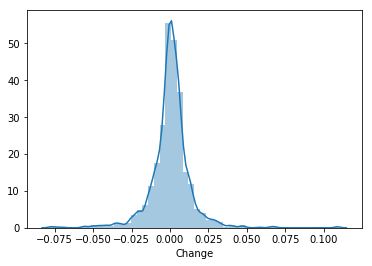

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split


djia = pd.read_csv("../data/raw/DJIA_table.csv", sep=',')

# Sort by date ascending
djia = djia.sort_values(['Date']).reset_index(drop=True)

# Calculate diff
diff = ((djia['Close'] - djia['Open']) / djia['Open'])
djia['Change'] = diff

# Split data into train and test because we want to holdout
train, _, _, _ = train_test_split(djia, [''] * len(djia), train_size=0.8, test_size=0.2, shuffle=False)
diff = train['Change']

# Show values plot
sns.distplot(diff)
print('Mean: {} Variance: {}'.format(np.mean(diff), np.var(diff)))

def assign_classes(df, borders):
    assert len(borders) == 4, 'Split only to five classes!'
    df.loc[df['Change'] < borders[0], 'Class'] = 'BF'
    df.loc[(df['Change'] >= borders[0]) & (df['Change'] < borders[1]), 'Class'] = 'SF'
    df.loc[(df['Change'] >= borders[1]) & (df['Change'] < borders[2]), 'Class'] = 'C'
    df.loc[(df['Change'] >= borders[2]) & (df['Change'] < borders[3]), 'Class'] = 'SR'
    df.loc[borders[3] <= df['Change'], 'Class'] = 'BR'
        
def stats(df, borders):
    grouped = djia.sort_values(['Change']).reset_index().groupby(['Class'])
    print(grouped.size())
    print(borders)
    for name, group in grouped:
        plt.scatter(group.index, group['Change'])
    

Class
BF       4
BR       4
C     1854
SF      67
SR      60
dtype: int64
[-0.06559757883874962, -0.02186585961291654, 0.02186585961291654, 0.06559757883874962]


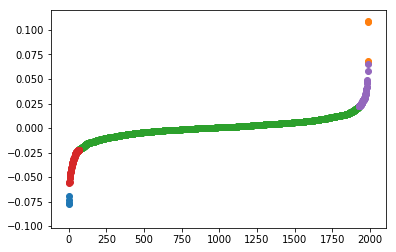

In [2]:
diff_max = max(abs(diff))

chunk_size = diff_max / 2.5
inner = 0.5 * chunk_size
outer = 1.5 * chunk_size
borders = [-outer, -inner, inner, outer]

assign_classes(djia, borders)
stats(djia, borders)

Class
BF    402
BR    398
C     403
SF    403
SR    383
dtype: int64
[-0.006238072240499911, -0.0008752288724657559, 0.0024946411382435686, 0.006956851701719883]


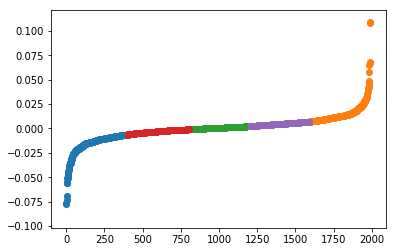

In [3]:
diff_sort = sorted(diff)

chunk_size = len(diff_sort) / 5
outer_negative = diff_sort[int(chunk_size)]
inner_negative = diff_sort[int(2 * chunk_size)]
inner_positive = diff_sort[int(3 * chunk_size)]
outer_positive = diff_sort[int(4 * chunk_size)]
borders = [outer_negative, inner_negative, inner_positive, outer_positive]

assign_classes(djia, borders)
stats(djia, borders)

Class
BF    383
BR    427
C     406
SF    341
SR    432
dtype: int64
[-0.0066384002956695835, -0.0016344870794651055, 0.0016344870794651055, 0.0066384002956695835]


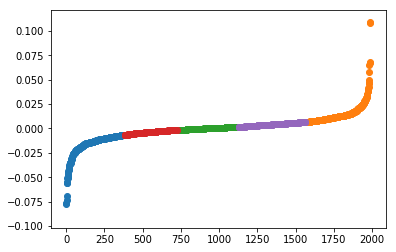

In [4]:
diff_abs = sorted(abs(diff - np.mean(diff)))

chunk_size = len(diff_abs) / 5
inner = diff_abs[int(chunk_size)]
outer = diff_abs[int(3 * chunk_size)]
borders = [-outer, -inner, inner, outer]

assign_classes(djia, borders)
stats(djia, borders)